In [1]:
import os
import pandas as pd
import nltk as nltk
import numpy as np
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from gensim import corpora, models
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.dates as mdates
from collections import Counter
import datetime


C:\Users\sbens\Miniconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\sbens\Miniconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\sbens\Miniconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)
C:\Users\sbens\Miniconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [17]:
cwd = os.getcwd()
print(cwd)

C:\Users\sbens\Desktop\Covid_RP\covid19_twitter


In [19]:
fr_01 = pd.read_json("fr_data/hydrated_fr_tweets01_short.json", lines=True)
fr_02 = pd.read_json("fr_data/hydrated_fr_tweets02_short.json", lines=True)
fr_03 = pd.read_json("fr_data/hydrated_fr_tweets03_short.json", lines=True)
fr_04 = pd.read_json("fr_data/hydrated_fr_tweets04_short.json", lines=True)
fr_05 = pd.read_json("fr_data/hydrated_fr_tweets05_short.json", lines=True)

In [20]:
fr_06 = pd.read_json("fr_data/hydrated_fr_tweets06_short.json", lines=True)
fr_07 = pd.read_json("fr_data/hydrated_fr_tweets07_short.json", lines=True)
fr_08 = pd.read_json("fr_data/hydrated_fr_tweets08_short.json", lines=True)
fr_09 = pd.read_json("fr_data/hydrated_fr_tweets09_short.json", lines=True)
fr_10 = pd.read_json("fr_data/hydrated_fr_tweets10_short.json", lines=True)
fr_11 = pd.read_json("fr_data/hydrated_fr_tweets11_short.json", lines=True)

In [21]:
fr_tweets = pd.concat([fr_01, fr_02, fr_03, fr_04, fr_05, fr_06, fr_07, fr_08, fr_09, fr_10, fr_11], ignore_index = True)

### Pre-processing

In [46]:
fr_stop = stopwords.words('french')

C:\Users\sbens\Miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [47]:
MyStopwords = ["a","abord","absolument","afin","ah","ai","aie","aient","aies","ailleurs","ainsi","ait","allaient","allo","allons","allô","alors","anterieur","anterieure","anterieures","apres","après","as","assez","attendu","au","aucun","aucune","aucuns","aujourd","aujourd'hui","aupres","auquel","aura","aurai","auraient","aurais","aurait","auras","aurez","auriez","aurions","aurons","auront","aussi","autant","autre","autrefois","autrement","autres","autrui","aux","auxquelles","auxquels","avaient","avais","avait","avant","avec","avez","aviez","avions","avoir","avons","ayant","ayez","ayons","b","bah","bas","basee","bat","beau","beaucoup","bien","bigre","bon","boum","bravo","brrr","c","car","ce","ceci","cela","celle","celle-ci","celle-là","celles","celles-ci","celles-là","celui","celui-ci","celui-là","celà","cent","cependant","certain","certaine","certaines","certains","certes","ces","cet","cette","ceux","ceux-ci","ceux-là","chacun","chacune","chaque","cher","chers","chez","chiche","chut","chère","chères","ci","cinq","cinquantaine","cinquante","cinquantième","cinquième","clac","clic","combien","comme","comment","comparable","comparables","compris","concernant","contre","couic","crac","d","da","dans","de","debout","dedans","dehors","deja","déjà","delà","depuis","dernier","derniere","derriere","derrière","des","desormais","desquelles","desquels","dessous","dessus","deux","deuxième","deuxièmement","devant","devers","devra","devrait","different","differentes","differents","différent","différente","différentes","différents","dire","directe","directement","dit","dite","dits","divers","diverse","diverses","dix","dix-huit","dix-neuf","dix-sept","dixième","doit","doivent","donc","dont","dos","douze","douzième","dring","droite","du","duquel","durant","dès","début","désormais","e","effet","egale","egalement","egales","eh","elle","elle-même","elles","elles-mêmes","en","encore","enfin","entre","envers","environ","es","essai","est","et","etant","etc","etre","eu","eue","eues","euh","eurent","eus","eusse","eussent","eusses","eussiez","eussions","eut","eux","eux-mêmes","exactement","excepté","extenso","exterieur","eûmes","eût","eûtes","f","fais","faisaient","faisant","fait","faites","façon","feront","fi","flac","floc","fois","font","force","furent","fus","fusse","fussent","fusses","fussiez","fussions","fut","fûmes","fût","fûtes","g","gens","h","ha","haut","hein","hem","hep","hi","ho","holà","hop","hormis","hors","hou","houp","hue","hui","huit","huitième","hum","hurrah","hé","hélas","i","ici","il","ils","importe","j","je","jusqu","jusque","juste","k","l","la","laisser","laquelle","las","le","lequel","les","lesquelles","lesquels","leur","leurs","longtemps","lors","lorsque","lui","lui-meme","lui-même","là","lès","m","ma","maint","maintenant","mais","malgre","malgré","maximale","me","meme","memes","merci","mes","mien","mienne","miennes","miens","mille","mince","mine","minimale","moi","moi-meme","moi-même","moindres","moins","mon","mot","moyennant","multiple","multiples","même","mêmes","n","na","naturel","naturelle","naturelles","ne","neanmoins","necessaire","necessairement","neuf","neuvième","ni","nombreuses","nombreux","nommés","non","nos","notamment","notre","nous","nous-mêmes","nouveau","nouveaux","nul","néanmoins","nôtre","nôtres","o","oh","ohé","ollé","olé","on","ont","onze","onzième","ore","ou","ouf","ouias","oust","ouste","outre","ouvert","ouverte","ouverts","o|","où","p","paf","pan","par","parce","parfois","parle","parlent","parler","parmi","parole","parseme","partant","particulier","particulière","particulièrement","pas","passé","pendant","pense","permet","personne","personnes","peu","peut","peuvent","peux","pff","pfft","pfut","pif","pire","pièce","plein","plouf","plupart","plus","plusieurs","plutôt","possessif","possessifs","possible","possibles","pouah","pour","pourquoi","pourrais","pourrait","pouvait","prealable","precisement","premier","première","premièrement","pres","probable","probante","procedant","proche","près","psitt","pu","puis","puisque","pur","pure","q","qu","quand","quant","quant-à-soi","quanta","quarante","quatorze","quatre","quatre-vingt","quatrième","quatrièmement","que","quel","quelconque","quelle","quelles","quelqu'un","quelque","quelques","quels","qui","quiconque","quinze","quoi","quoique","r","rare","rarement","rares","relative","relativement","remarquable","rend","rendre","restant","reste","restent","restrictif","retour","revoici","revoilà","rien","s","sa","sacrebleu","sait","sans","sapristi","sauf","se","sein","seize","selon","semblable","semblaient","semble","semblent","sent","sept","septième","sera","serai","seraient","serais","serait","seras","serez","seriez","serions","serons","seront","ses","seul","seule","seulement","si","sien","sienne","siennes","siens","sinon","six","sixième","soi","soi-même","soient","sois","soit","soixante","sommes","son","sont","sous","souvent","soyez","soyons","specifique","specifiques","speculatif","stop","strictement","subtiles","suffisant","suffisante","suffit","suis","suit","suivant","suivante","suivantes","suivants","suivre","sujet","superpose","sur","surtout","t","ta","tac","tandis","tant","tardive","te","tel","telle","tellement","telles","tels","tenant","tend","tenir","tente","tes","tic","tien","tienne","tiennes","tiens","toc","toi","toi-même","ton","touchant","toujours","tous","tout","toute","toutefois","toutes","treize","trente","tres","trois","troisième","troisièmement","trop","très","tsoin","tsouin","tu","té","u","un","une","unes","uniformement","unique","uniques","uns","v","va","vais","valeur","vas","vers","via","vif","vifs","vingt","vivat","vive","vives","vlan","voici","voie","voient","voilà","voire","vont","vos","votre","vous","vous-mêmes","vu","vé","vôtre","vôtres","w","x","y","z","zut","à","â","ça","ès","étaient","étais","était","étant","état","étiez","étions","été","étée","étées","étés","êtes","être","ô"]

C:\Users\sbens\Miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [48]:
MesAjouts = ["cest","amp","je","tu","il","elle","on","nous","vous","ils","elles","oui","non","les","le","dans","des","de","vraiment","faire","quil","aller","jai","le…","bientôt","bientot","dun", "mdr", "nest","n'est","000"]

C:\Users\sbens\Miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [49]:
fr_keywords = ["COVD19", "CoronavirusPandemic", "COVID-19", "2019nCoV", "CoronaOutbreak", "coronavirus", "WuhanVirus", "covid19", "coronaviruspandemic", "covid-19", "2019ncov", "coronaoutbreak", "wuhanvirus"]

C:\Users\sbens\Miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [50]:
full_stopwords = fr_stop + MyStopwords + MesAjouts + fr_keywords
full_stopwords = list(set(full_stopwords))

C:\Users\sbens\Miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [51]:
def preprocess_tweet_text(tweet):
    # Remove urls
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)
    # Remove user @ references and '#' from tweet
    tweet = re.sub(r'\@\w+|\#','', tweet)
    # Remove punctuations
    remove = string.punctuation
    remove = remove.replace("#", "") # don't remove hyphens
    pattern = r"[{}]".format(remove) # create the pattern
    tweet = tweet.translate({ord(char): None for char in remove})
    tweet = tweet.lower()
    # Remove stopwords
    tweet_tokens = word_tokenize(tweet)
    words = [w for w in tweet_tokens if len(w)>2]
    filtered_words = [w for w in words if not w in full_stopwords]
    return filtered_words

C:\Users\sbens\Miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [52]:
#def remove_keywords(tweet):
#    filtered_words = [w for w in tweet if not w in fr_keywords]
#    return filtered_words

C:\Users\sbens\Miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Topic Modeling over entire dataframe

In [53]:
fr_tweets["token_clean"] = fr_tweets["text"].apply(lambda x: preprocess_tweet_text(x))

C:\Users\sbens\Miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [54]:
#fr_tweets["no_keyword"] = fr_tweets["token_clean"].apply(lambda x: remove_keywords(x))

C:\Users\sbens\Miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [55]:
dictionary_LDA = corpora.Dictionary(fr_tweets["token_clean"])
dictionary_LDA.filter_extremes(no_below=500, keep_n=1000)
corpus = [dictionary_LDA.doc2bow(list_of_tokens) for list_of_tokens in fr_tweets["token_clean"]]

num_topics = 7
%time lda_model = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary_LDA, passes=4, alpha=[0.01]*num_topics, eta=[0.01]*len(dictionary_LDA.keys()))

C:\Users\sbens\Miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Wall time: 40min 37s
Parser   : 520 ms


In [56]:
lda_model.save('lda_modelouai5')

C:\Users\sbens\Miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [57]:
fr_tweets["TOPIC_PCT"] = fr_tweets["token_clean"].apply(lambda x: lda_model[dictionary_LDA.doc2bow(x)])

C:\Users\sbens\Miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [58]:
f = open("corpus5.txt","w")
f.write( str(corpus) )
f.close()

C:\Users\sbens\Miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [59]:
for i,topic in lda_model.show_topics(formatted=True, num_topics=num_topics, num_words=10):
    print(str(i)+": "+ topic)
    print()

C:\Users\sbens\Miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0: 0.134*"cas" + 0.126*"france" + 0.060*"décès" + 0.053*"ans" + 0.052*"centre" + 0.027*"patients" + 0.023*"chiffres" + 0.022*"baisse" + 0.018*"annonce" + 0.016*"population"

1: 0.130*"vaccin" + 0.051*"pandémie" + 0.036*"macron" + 0.033*"mois" + 0.033*"demain" + 0.031*"gouvernement" + 0.021*"confinement" + 0.020*"partir" + 0.019*"taux" + 0.015*"nouvelles"

2: 0.047*"faut" + 0.038*"nouvelle" + 0.037*"enfants" + 0.030*"face" + 0.028*"mesures" + 0.024*"bonne" + 0.020*"mieux" + 0.019*"allez" + 0.016*"peur" + 0.016*"question"

3: 0.101*"vaccins" + 0.091*"mai" + 0.050*"jour" + 0.035*"situation" + 0.032*"point" + 0.029*"aujourdhui" + 0.026*"2020" + 0.019*"risque" + 0.019*"cause" + 0.018*"veut"

4: 0.084*"monde" + 0.062*"sanitaire" + 0.052*"crise" + 0.049*"morts" + 0.044*"nombre" + 0.038*"fin" + 0.038*"masque" + 0.029*"jours" + 0.025*"bilan" + 0.024*"disponible"

5: 0.045*"millions" + 0.043*"virus" + 0.042*"temps" + 0.041*"pays" + 0.033*"direct" + 0.030*"québec" + 0.029*"vie" + 0.025*"tests" + 

In [60]:
%matplotlib inline
import pyLDAvis
import pyLDAvis.gensim_models

C:\Users\sbens\Miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [43]:
fr_tweets

C:\Users\sbens\Miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,created_at,text,in_reply_to_screen_name,retweet_count,favorite_count,source,id_str,is_retweet,token_clean,TOPIC_PCT
0,2020-01-23 12:42:37+00:00,Nouveau coronavirus: les habitudes alimentaire...,None,0,0,Twitter for iPhone,1220325966611931136,False,"[habitudes, alimentaires, chinois, cause]","[(1, 0.48792508), (3, 0.48791972)]"
1,2020-01-23 04:24:45+00:00,"@QuickTake #coronavirus usual suspect, the #sn...",Quicktake,1,1,Twitter Web App,1220200674375368704,False,"[usual, suspect, the, snake, like, the, bible,...","[(1, 0.9710142)]"
2,2020-01-23 11:07:49+00:00,J’arrête pas de tousser #coronavirus,None,0,0,Twitter for iPhone,1220302109427539968,False,"[arrête, tousser]","[(1, 0.9439222)]"
3,2020-01-23 06:21:11+00:00,Coronavirus chinois : plus mystérieux que la p...,None,0,0,Twitter Web App,1220229975787425792,False,"[chinois, mystérieux, peste, paludisme, choléra]","[(3, 0.94392467)]"
4,2020-01-23 00:47:26+00:00,Faut-il s’inquiéter d’une éventuelle mutation ...,None,0,0,Twitter Web App,1220145984866594816,False,"[fautil, inquiéter, éventuelle, mutation]","[(5, 0.94392365)]"
...,...,...,...,...,...,...,...,...,...,...
9047061,2021-05-23 02:58:18+00:00,"Covid-19 : dès le 7 juin, l’Espagne laissera e...",None,0,0,WordPress.com,1396299421520961536,False,"[juin, espagne, laissera, entrer, vaccinées, t...","[(0, 0.14285713), (1, 0.14285713), (2, 0.14285..."
9047062,2021-05-23 03:08:26+00:00,"« Je suis testé positif aujourd’hui même, ce 2...",None,0,0,Twitter for Android,1396301971519381504,False,"[testé, positif, mai, mai, ressentais, malaise...","[(6, 0.98045594)]"
9047063,2021-05-23 03:30:00+00:00,Covid-19 : léger recul de la pandémie dans le ...,None,1,5,TweetDeck,1396307397241606144,False,"[léger, recul, pandémie, monde, exception, pac...","[(2, 0.98045594)]"
9047064,2021-05-23 02:58:18+00:00,Le Covid-19 a fait plus d’un million de morts ...,None,0,0,WordPress.com,1396299419600007168,False,"[million, morts, amérique, sud, caraïbes, lci]","[(0, 0.32897207), (5, 0.65474063)]"


In [61]:
start_date = datetime.date(2020,1,12)
end_date = datetime.date(2021,5,23)
range_time = (end_date-start_date).days//7
topic = [[[i,0] for i in range(7)] for k in range(range_time)]
current_date = start_date
week = 0
while current_date<end_date:
    total = 0
    for j in range(len(fr_tweets)):
        if (fr_tweets["created_at"].iloc[j] >= current_date) and (fr_tweets["created_at"].iloc[j] <= current_date+datetime.timedelta(7)):
            total+=1
            for k in fr_tweets["TOPIC_PCT"].iloc[j]:
                topic[week][k[0]][1]+=k[1]
    for t in topic[week]:
        if total !=0:
            t[1] = t[1]/total
        else:
            t[1] = 0
    print(topic[week])
    week+=1
    print(week)
    current_date=current_date+datetime.timedelta(7)

C:\Users\sbens\Miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[0, 0.32899582386016846], [1, 0.0], [2, 0.0], [3, 0.0], [4, 0.6547170877456665], [5, 0.0], [6, 0.0]]
1
[[0, 0.1965841081644922], [1, 0.14614191918629701], [2, 0.13907308645980776], [3, 0.15290226920971423], [4, 0.11109514644728648], [5, 0.10814983137118976], [6, 0.12548383365431173]]
2
[[0, 0.19252914842063226], [1, 0.13510047467104994], [2, 0.135516407295948], [3, 0.16355245656708725], [4, 0.11021531321452134], [5, 0.12581737228047774], [6, 0.11531880766129851]]
3
[[0, 0.1782875581275321], [1, 0.14225471836612671], [2, 0.12413125688593962], [3, 0.19078071560799745], [4, 0.1260651938189956], [5, 0.11357974755043788], [6, 0.10278858959663129]]
4
[[0, 0.17997022787823336], [1, 0.14573906916340804], [2, 0.12589855794694294], [3, 0.18069263478556014], [4, 0.13934844244774544], [5, 0.1003680651606054], [6, 0.10612150741422223]]
5
[[0, 0.18623123296948565], [1, 0.16081980941087456], [2, 0.12408240906956187], [3, 0.16963973914378125], [4, 0.12588214108957893], [5, 0.10450123965111034], [6, 0

[[0, 0.13804238157918963], [1, 0.18679674781789365], [2, 0.13012540666836805], [3, 0.13722231520740885], [4, 0.12108430186431685], [5, 0.1285225011456675], [6, 0.13493055067699122]]
46
[[0, 0.14079170161884602], [1, 0.18555377544353668], [2, 0.1253524544807225], [3, 0.13797877675388723], [4, 0.12280658147980864], [5, 0.12576648376891703], [6, 0.13867566256047983]]
47
[[0, 0.13499882977894506], [1, 0.1806683947716241], [2, 0.12852084322201934], [3, 0.13410267822434518], [4, 0.12286762804483178], [5, 0.13312078633266303], [6, 0.1428018876650401]]
48
[[0, 0.13048476190193176], [1, 0.1889670098315743], [2, 0.1383663828883996], [3, 0.13023949474572355], [4, 0.11528162273766522], [5, 0.13149871966059917], [6, 0.14223082771790932]]
49
[[0, 0.14055412248284652], [1, 0.17891554129756815], [2, 0.14187314084520786], [3, 0.13077300499189812], [4, 0.11415851791849559], [5, 0.13234504040863274], [6, 0.1381045932099149]]
50
[[0, 0.1464969464816824], [1, 0.1821872519985242], [2, 0.13458023044001236], 

In [113]:
vis = pyLDAvis.gensim_models.prepare(topic_model=lda_model, corpus=corpus, dictionary=dictionary_LDA)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

C:\Users\sbens\Miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [2]:
import pickle

In [7]:
list_name = "topic_weeks.pkl"

In [4]:
open_file = open(list_name, "wb")
pickle.dump(topic, open_file)
open_file.close()

NameError: name 'topic' is not defined

In [8]:
open_file = open(list_name, "rb")
topic = pickle.load(open_file)
open_file.close()

EOFError: Ran out of input

In [66]:
range_time = 71

C:\Users\sbens\Miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [93]:
topics_condensed_list = [np.zeros(range_time) for i in range(7)]
for i in range(7):
    for j in range(range_time):
        topics_condensed_list[i][j] = topic[j][i][1]
    

C:\Users\sbens\Miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [94]:
start_date = datetime.date(2020,1,12)
end_date = datetime.date(2021,5,23)
range_time = (end_date-start_date).days//7
date_list = []
current_date = start_date

C:\Users\sbens\Miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [95]:
while current_date < end_date:
    date_list.append(current_date)
    current_date = current_date+datetime.timedelta(7)

C:\Users\sbens\Miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\sbens\Miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


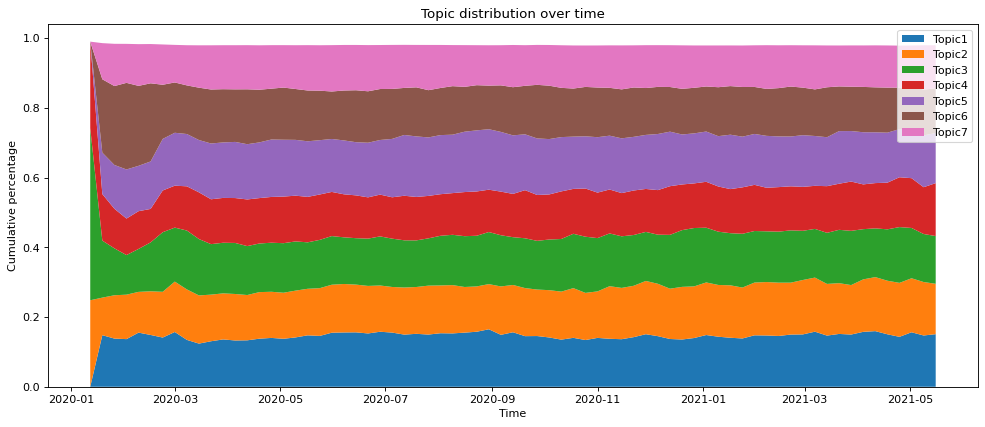

In [104]:
fig, ax = plt.subplots(figsize=(15, 6), dpi=80)
x=date_list
y0=topics_condensed_list[0]
y1=topics_condensed_list[1]
y2=topics_condensed_list[2]
y3=topics_condensed_list[3]
y4=topics_condensed_list[4]
y5=topics_condensed_list[5]
y6=topics_condensed_list[6]
plt.stackplot(x,y0, y1, y2, y3, y4, y5, y6, labels=['Topic1','Topic2','Topic3','Topic4','Topic5','Topic6', 'Topic7'])
plt.xlabel("Time")
plt.ylabel("Cumulative percentage")
plt.title("Topic distribution over time")
# Basic stacked area chart.
plt.legend(loc='best')
plt.show()

C:\Users\sbens\Miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


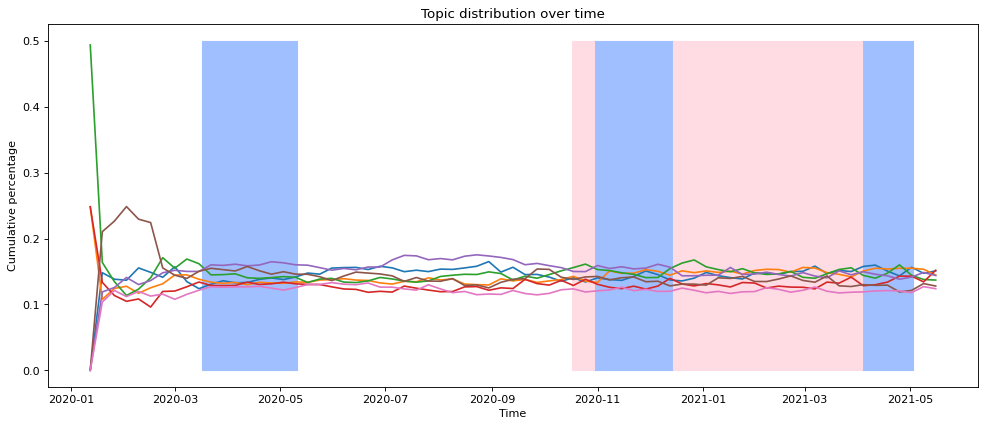

In [112]:
fig, ax = plt.subplots(figsize=(15, 6), dpi=80)
x=date_list
y0=topics_condensed_list[0]
y1=topics_condensed_list[1]
y2=topics_condensed_list[2]
y3=topics_condensed_list[3]
y4=topics_condensed_list[4]
y5=topics_condensed_list[5]
y6=topics_condensed_list[6]

plt.plot(x, y0, label="Topic 1")
plt.plot(x, y1, label="Topic 2")
plt.plot(x, y2, label="Topic 3")
plt.plot(x, y3, label="Topic 4")
plt.plot(x, y4, label="Topic 5")
plt.plot(x, y5, label="Topic 6")
plt.plot(x, y6, label="Topic 7")

conf1start = mdates.date2num(datetime.date(2020, 3, 17))
conf1end = mdates.date2num(datetime.date(2020, 5, 11))
conf1length = conf1end - conf1start
conf1 = patches.Rectangle((conf1start,0), conf1length, 0.5, color="#a0bfff", label="confinement")
ax.add_patch(conf1)

conf2start = mdates.date2num(datetime.date(2020, 10, 30))
conf2end = mdates.date2num(datetime.date(2020, 12, 15))
conf2length = conf2end - conf2start
conf2 = patches.Rectangle((conf2start,-0), conf2length, 0.5, color="#a0bfff")
ax.add_patch(conf2)


conf3start = mdates.date2num(datetime.date(2021, 4, 3))
conf3end = mdates.date2num(datetime.date(2021, 5, 3))
conf3length = conf3end - conf3start
conf3 = patches.Rectangle((conf3start,-0), conf3length, 0.5, color="#a0bfff")
ax.add_patch(conf3)

cvfeu1start = mdates.date2num(datetime.date(2020, 10, 17))
cvfeu1end = mdates.date2num(datetime.date(2020, 10, 30))
cvfeu1length = cvfeu1end - cvfeu1start
cvfeu1 = patches.Rectangle((cvfeu1start,-0), cvfeu1length, 0.5, color="#FFDCE4", label="couvre feu")
ax.add_patch(cvfeu1)

cvfeu2start = mdates.date2num(datetime.date(2020, 12, 15))
cvfeu2end = mdates.date2num(datetime.date(2021, 4, 3))
cvfeu2length = cvfeu2end - cvfeu2start
cvfeu2 = patches.Rectangle((cvfeu2start,-0), cvfeu2length, 0.5, color="#FFDCE4")
ax.add_patch(cvfeu2)

plt.xlabel("Time")
plt.ylabel("Cumulative percentage")
plt.title("Topic distribution over time")
# Basic stacked area chart.
plt.show()

C:\Users\sbens\Miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
